<a href="https://colab.research.google.com/github/Divjot1027/AQI-Calculation-/blob/main/AQI_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [ ]:
years = ['2020', '2021', '2022', '2023', '2024']
stations = ['Anand Vihar', 'Collectorate', 'Rajbansi Nagar', 'Chhoti Gwaltoli', 'GVM Corporation']
categories = ['0-50 : Good', '51-100 : Satisfactory', '101-200 : Moderate', '201-300 : Poor', '301-400 : Very Poor', '401-500 : Severe']


In [ ]:
colors = aqi_colors = [
     '#009865',          # Green
    '#A3C853',  # Light Green/Yellow-Green
   '#FFF833',      # Yellow
   '#F29C33',          # Orange
   '#E93F33',     # Red
    '#AF2D24'         # Dark Red
]

In [ ]:
years = ['2020', '2021', '2022', '2023', '2024']
stations = ['Anand Vihar', 'Collectorate', 'Rajbansi Nagar', 'Chhoti Gwaltoli', 'GVM Corporation']
categories = [
    '0-50 : Good',
    '51-100 : Satisfactory',
    '101-200 : Moderate',
    '201-300 : Poor',
    '301-400 : Very Poor',
    '401-500 : Severe'
]
colors = [
    '#009865',  # Good
    '#A3C853',  # Satisfactory
    '#FFF833',  # Moderate
    '#F29C33',  # Poor
    '#E93F33',  # Very Poor
    '#AF2D24'   # Severe
]

# Raw data: years × stations × categories
raw_data = [
    [   # 2020
        [3, 65, 91, 62, 55, 30],        # Anand Vihar
        [0, 23, 54, 46, 38, 29],        # Collectorate
        [2, 33, 54, 90, 95, 43],        # Rajbansi Nagar
        [3, 30, 79, 78, 62, 48],        # Chhoti Gwaltoli
        [0, 17, 79, 67, 92, 46]         # GVM Corporation
    ],
    [   # 2021
        [3, 98, 145, 49, 2, 0],         # Anand Vihar
        [0, 62, 162, 64, 8, 0],         # Collectorate
        [5, 90, 79, 108, 63, 2],        # Rajbansi Nagar
        [np.nan]*6,                     # Chhoti Gwaltoli (no data)
        [22, 86, 191, 38, 7, 0]         # GVM Corporation
    ],
    [   # 2022
        [37, 39, 63, 32, 23, 2],        # Anand Vihar
        [31, 54, 89, 69, 46, 0],        # Collectorate
        [14, 83, 67, 81, 83, 5],        # Rajbansi Nagar
        [3, 63, 120, 84, 58, 2],        # Chhoti Gwaltoli
        [26, 82, 124, 82, 17, 0]        # GVM Corporation
    ],
    [   # 2023
        [36, 119, 130, 14, 0, 0],       # Anand Vihar
        [38, 66, 106, 37, 0, 0],        # Collectorate
        [22, 77, 138, 7, 0, 0],         # Rajbansi Nagar
        [np.nan]*6,                     # Chhoti Gwaltoli (no data)
        [4, 142, 165, 40, 2, 0]         # GVM Corporation
    ],
    [   # 2024
        [37, 84, 86, 31, 4, 0],         # Anand Vihar
        [31, 70, 100, 24, 0, 0],        # Collectorate
        [27, 130, 148, 21, 1, 0],       # Rajbansi Nagar
        [6, 107, 160, 39, 2, 0],        # Chhoti Gwaltoli
        [20, 145, 157, 16, 5, 0]        # GVM Corporation
    ]
]

raw_data = np.array(raw_data, dtype=float)


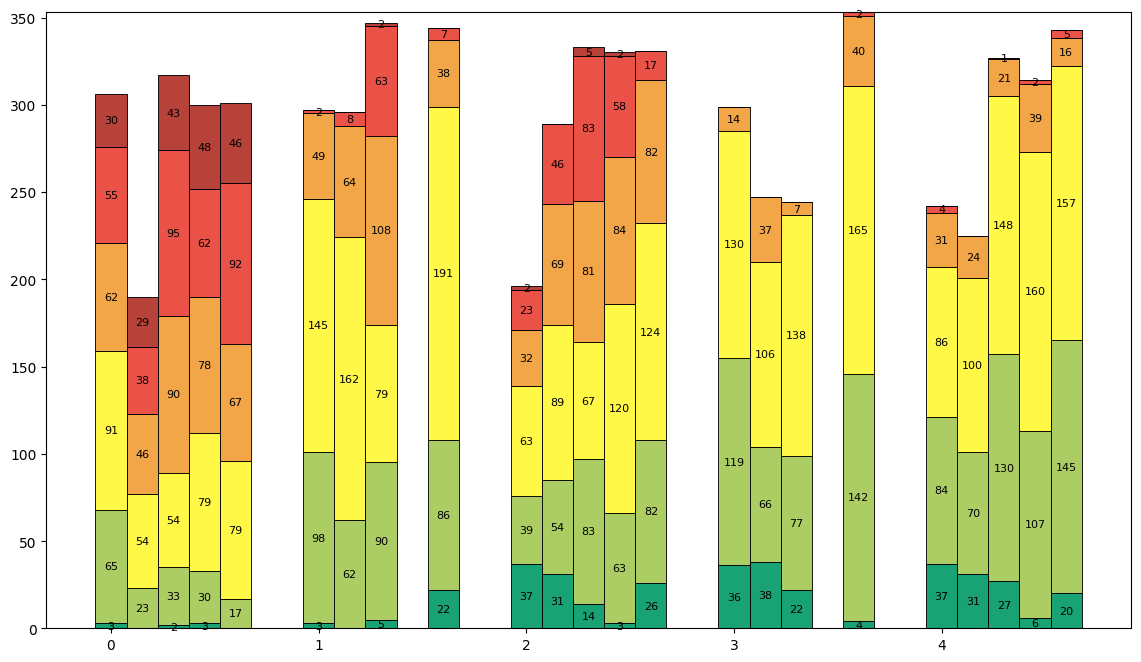

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.15
indices = np.arange(len(years))

for i, station in enumerate(stations):
    bottoms = np.zeros(len(years))
    for j, category in enumerate(categories):
        values = raw_data[:, i, j]
        values = np.nan_to_num(values)
        label = categories[j] if i == 0 else None
        bars = ax.bar(indices + i * bar_width, values, bar_width,
                      bottom=bottoms, color=colors[j], label=label,
                      alpha=0.9, edgecolor='black', linewidth=0.7)
        bottoms += values

        for bar, val in zip(bars, values):
            if val > 0:
                ax.text(bar.get_x() + bar.get_width()/2,
                        bar.get_y() + bar.get_height()/2,
                        f'{int(val)}', ha='center', va='center', fontsize=8)


In [ ]:
# Axis labels and title
ax.set_xlabel('Year', fontsize=12, labelpad=10)
ax.set_ylabel('Number of Days', fontsize=12, labelpad=10)
ax.set_title('AQI of Various Monitoring Stations Across the Years',
             fontsize=16, fontweight='bold', pad=15)

# X-ticks centered among grouped bars
ax.set_xticks(indices + (len(stations) - 1) * bar_width / 2)
ax.set_xticklabels(years, fontsize=11)

# Legends
handles_cat = [Patch(facecolor=colors[j], edgecolor='black', label=categories[j])
               for j in range(len(categories))]
legend1 = ax.legend(handles=handles_cat, title="AQI Category",
                    bbox_to_anchor=(1.02, 1), loc='upper left',
                    fontsize=12, title_fontsize=14)

handles_station = [Patch(facecolor='white', edgecolor='black', label=stations[i])
                   for i in range(len(stations))]
legend2 = ax.legend(handles=handles_station, title="Station",
                    bbox_to_anchor=(1.02, 0.55), loc='upper left',
                    fontsize=12, title_fontsize=14)
ax.add_artist(legend1)


In [ ]:
# Grid, spines, layout
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>